In [6]:
from datetime import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

Part 1:
Прокурор оценил вероятности:
1% -  что у произвольного человека такая группа крови
99% - у произвольно взятого человека другая группа крови
Нужно было оценить вероятность того, что он убил при цсловии того, что у него такая группа крови

Part 2:
Адвокат посчитал вероятность виновности без учета каких-то фактов, а нужно было принимать их во внимание.

Part 3:

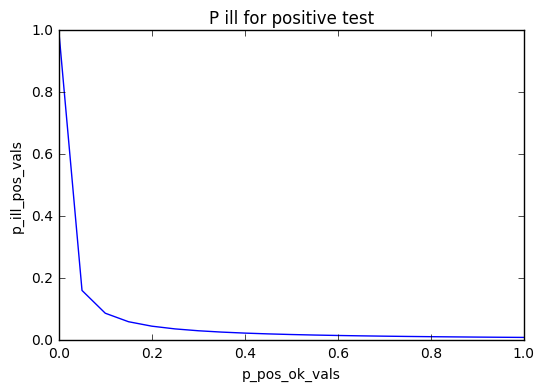

In [7]:
def calc_p_ill_pos(p_pos_ok):
    p_pos_ill = 0.95
    p_ill = 0.01
    p_ok = 0.99
    p_ill_pos = (p_pos_ill * p_ill) / (p_pos_ill * p_ill + p_pos_ok * p_ok)
    return p_ill_pos
    
def p_ill_pos_plot():
    p_ill_pos_vals = []
    p_pos_ok_vals = [x / 100.0 for x in range(0, 101, 5)]
    for val in p_pos_ok_vals:
        p_ill_pos_vals.append(calc_p_ill_pos(val))
    plt.plot(p_pos_ok_vals, p_ill_pos_vals)
    plt.title('P ill for positive test')
    plt.xlabel('p_pos_ok_vals')
    plt.ylabel('p_ill_pos_vals')
    plt.show()
    
p_ill_pos_plot()

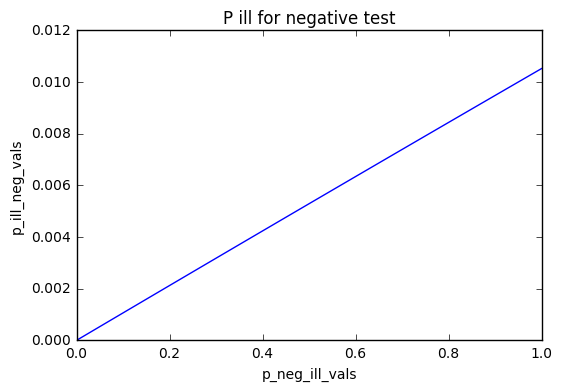

In [9]:
def calc_p_ill_neg(p_neg_ill):
    p_neg_ok = 0.95
    p_ill = 0.01
    p_ok = 0.99
    p_ill_neg = (p_neg_ill * p_ill) / (p_neg_ill * p_ill + p_neg_ok * p_ok)
    return p_ill_neg
    
def p_ill_neg_plot():
    p_ill_neg_vals = []
    p_neg_ill_vals = [x / 100.0 for x in range(0, 101, 5)]
    for val in p_neg_ill_vals:
        p_ill_neg_vals.append(calc_p_ill_neg(val))
    plt.plot(p_neg_ill_vals, p_ill_neg_vals)
    plt.title('P ill for negative test')
    plt.xlabel('p_neg_ill_vals')
    plt.ylabel('p_ill_neg_vals')
    plt.show()

p_ill_neg_plot()

It's more important to reduce the probability of FP

In [ ]:
# LR Task

In [2]:
data = pd.read_csv('owid-covid-data.csv')

In [3]:
data = data[(data['date'] >= '2020-03-20') & (data['iso_code']=='RUS')]

In [4]:
Y_train = data[:50][["total_cases"]]
Y_train[Y_train["total_cases"] == 0] = 1
Y_train_log = np.log(Y_train)
X_train = np.array([[i,1] for i in range(1,Y_train.shape[0]+1)])
Y_test = data[50:][["total_cases"]]
Y_test[Y_test["total_cases"] == 0] = 1
X_test= np.array([[i,1] for i in range(1,Y_test.shape[0]+1)])

In [5]:
phi = X_train

In [6]:
w_ml = (np.linalg.inv(phi.T.dot(phi))).dot(phi.T).dot(Y_train_log)
w_ml

array([[0.13576958],
       [6.04876811]])

In [8]:
Y_train_log.values[49]

array([12.14344696])

In [9]:
phi.dot(w_ml)[49]

array([12.83724701])

In [10]:
Y_pred = pd.DataFrame(phi.dot(w_ml))

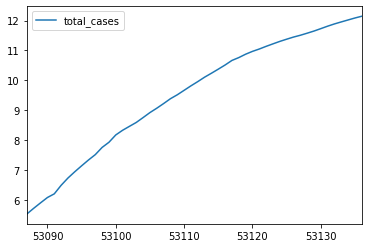

In [12]:
Y_train_log.plot()

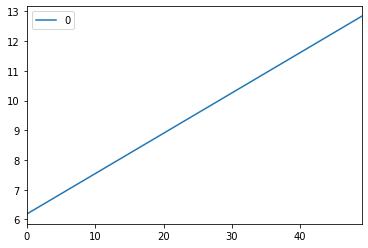

In [13]:
Y_pred.plot()

In [14]:
sigma = np.std(Y_pred.values-Y_train_log.values)
sigma

0.3534643529356834

In [15]:
def linreg_posterior(mu_0=np.array([[1],[1]]), Sigma_0=np.eye(2)):
    Sigma_0_inv = np.linalg.inv(Sigma_0)

    Sigma_posterior = np.linalg.inv(Sigma_0_inv + phi.T.dot(phi)/sigma**2)
    mu_posterior = Sigma_posterior.dot(Sigma_0_inv.dot(mu_0) + phi.T.dot(Y_train_log)/sigma**2)
    
    return mu_posterior, Sigma_posterior

In [16]:
mu_posterior, Sigma_posterior = linreg_posterior()
mu_posterior, Sigma_posterior

(array([[0.13730886],
        [5.99703008]]), array([[ 1.19059523e-05, -3.02845054e-04],
        [-3.02845054e-04,  1.01958131e-02]]))

In [17]:
may_1st = (datetime.strptime('2020-05-01', '%Y-%m-%d') - datetime.strptime('2020-03-20', '%Y-%m-%d')).days
jun_1st = (datetime.strptime('2020-06-01', '%Y-%m-%d') - datetime.strptime('2020-03-20', '%Y-%m-%d')).days
sep_1st = (datetime.strptime('2020-09-01', '%Y-%m-%d') - datetime.strptime('2020-03-20', '%Y-%m-%d')).days

In [20]:
def sample_posterior(day, n_samples = 500):
    X_date = np.array([day, 1])
    samples = np.random.multivariate_normal(mu_posterior[:,0], Sigma_posterior, n_samples)
    Y_samples = np.exp(pd.DataFrame(samples.dot(X_date.T)))
    
    Y_samples.plot.hist(bins=50)

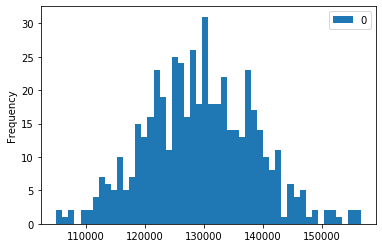

In [21]:
sample_posterior(may_1st)

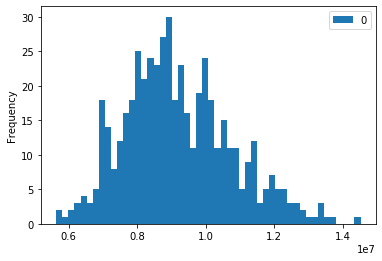

In [22]:
sample_posterior(jun_1st)

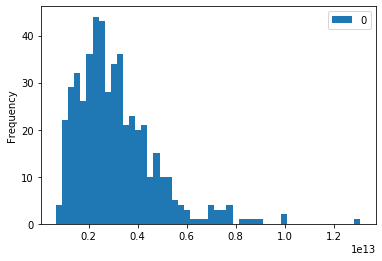

In [23]:
sample_posterior(sep_1st)

In [ ]:
# Exercise 3

In [24]:
phi = np.array([[i*i, i,  1] for i in range(1,Y_train.shape[0]+1)])

In [25]:
w_ml = (np.linalg.inv(phi.T.dot(phi))).dot(phi.T).dot(Y_train_log)
w_ml

array([[-1.88663475e-03],
       [ 2.31987951e-01],
       [ 5.21487555e+00]])

In [26]:
Y_pred = pd.DataFrame(phi.dot(w_ml))

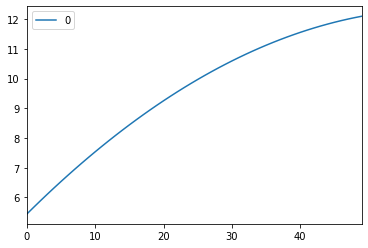

In [27]:
Y_pred.plot()

In [28]:
sigma = np.std(Y_pred.values-Y_train_log.values)
sigma

0.039927371441948654

In [29]:
def sample_posterior_probit(day, n_samples = 500):
    samples = np.random.multivariate_normal(mu_posterior[:,0], Sigma_posterior, n_samples)
    Y_samples = np.zeros(shape=(n_samples,1))
    for i in range(day):
        X_date = np.array([[i*i, i, 1]])
        day_samples = np.exp(pd.DataFrame(samples.dot(X_date.T)))
        Y_samples += day_samples
    
    Y_samples.plot.hist(bins=50)

In [30]:
mu_posterior, Sigma_posterior = linreg_posterior(np.ones_like(w_ml), np.eye(w_ml.shape[0]))

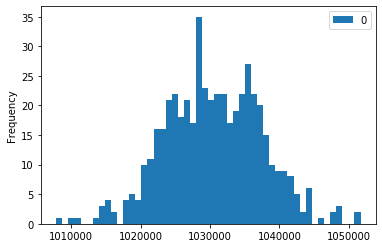

In [31]:
sample_posterior_probit(may_1st)

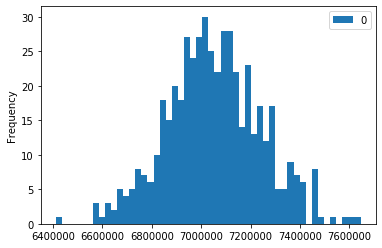

In [32]:
sample_posterior_probit(jun_1st)

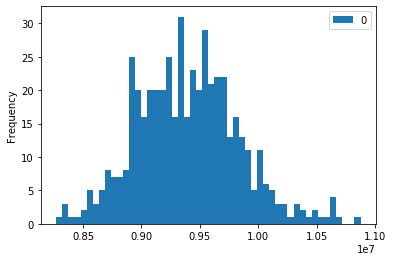

In [33]:
sample_posterior_probit(sep_1st)